

# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether

or not patients show up for their appointment. Several of characteristics of the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
 
we investigate this dataset to find why do 30% of patients miss their scheduled appointments?

Questions :

1- Does receiving an SMS affect the attendance of patients?

* by answering this question, we will understand if there is a correlation between receiving our patients an SMS and attendance the appointment, if the answer is yes then we should make sure that our future patients will receive an SMS to attend our medical appointment. 

2- Is there a correlation between having a scholarship and attendance?

* by answering this question, we will explore if most of our patients who attended the appointment had a scholarship or there is no relation, from the answer of this question we will know our patients more and find out if the patients that had a scholarship are more interested in this appointment or not.

3- Is there a correlation between gender and attendance of patients? 

* by answering this question, we will find out if males are more interested in attending this appointment or the reverse is true or they are the same. If the answer tells us they are not the same so we will try to find the reason for this case. Do we need to improve our services? 

4- Is age affect the attendance of patients?

* by answering this question, we will take a deeper look at the reason that makes 30% of our patients didn't attend, Is this absence related to the age of our patients.   

5- Is age and having diseases affect the attendance of patients?

* the answer to this question will make us more aware of the reasons that make 30% of our patients didn't attend the medical appointment, It will show if age and having some diseases affect the possibility of attendance. so in the future, we can predict those patients who will miss the appointment or contact those patients to arrange another appointment.

6- Is there a correlation between neighbourhood and attendance?

* by answering this question, we will know the most patients that attended the appointment according to the neighborhood.

In [2]:
# importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties
 Some information about data we have

In [3]:
# Load data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


 From the information I got from the data, I found there is a mistake in the name of some columns in the data like 

 Hipertenstion ,It must be Hypertension and also Handcap, It must be Handicap.

 There are no duplicated rows or any missing values.

 There are incorrect data and outliers in age.

 There are unnecessary columns in the data.
 
 


### Data Cleaning (Fixing some problems in data)

In [9]:
# Rename the incorrect columns
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace=True)
df.rename(columns=lambda x: x.strip().replace('-','_'), inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
# Remove the incorrect data of age
df.drop(index=99832, inplace=True)

In [12]:
df.query('Age > 100')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [13]:
# Remove the outliers of age
df.drop(index=58014, inplace=True)
df.drop(index=63912, inplace=True)
df.drop(index=63915, inplace=True)
df.drop(index=68127, inplace=True)
df.drop(index=76284, inplace=True)
df.drop(index=90372, inplace=True)
df.drop(index=97666, inplace=True)

In [14]:
df.query('Age > 100')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


In [15]:
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


In [16]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105190e+05,1.105190e+05,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000
mean,1.474860e+14,5.675303e+06,37.084519,0.098273,0.197251,0.071870,0.030402,0.022213,0.321040
std,2.560826e+14,7.129600e+04,23.103165,0.297684,0.397925,0.258274,0.171692,0.161441,0.466878
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172598e+13,5.680569e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725522e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [17]:
# Let's drop the unnecessary columns
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis = 1, inplace =True )
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis 

Now that the data has been cleaned, let's try to answer the questions we brought it up before. 

### Research Question 1 (Does receiving an SMS affect in the attendance?)

### General Vision

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hypertension'}>],
       [<AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handicap'}>],
       [<AxesSubplot:title={'center':'SMS_received'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

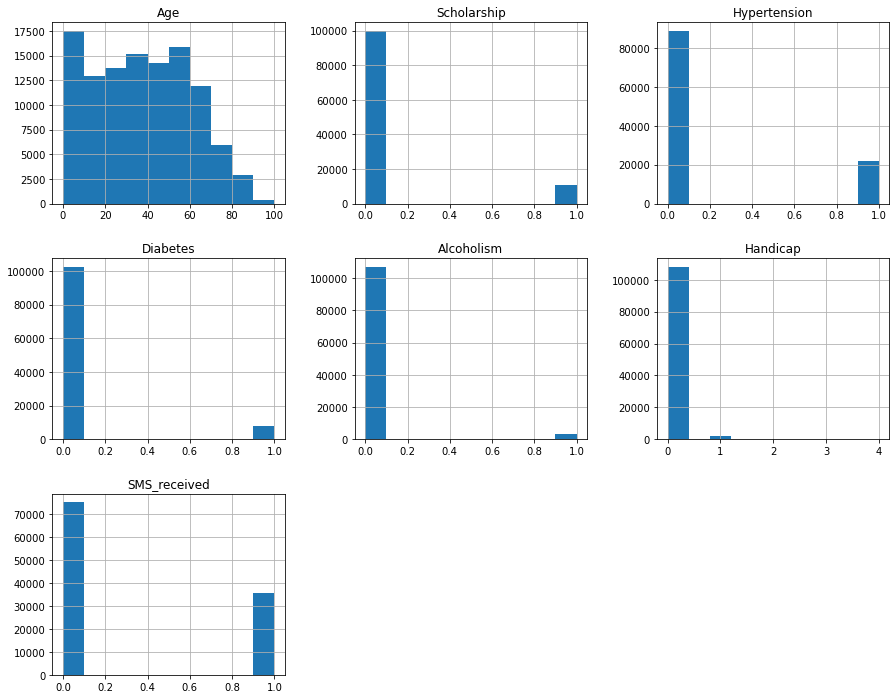

In [18]:
# let's take a general vision of our data
df.hist(figsize=(15, 12))

In [19]:
# number of patients who attended the appointment and who didn't show up
df['No_show'].value_counts()

No     88203
Yes    22316
Name: No_show, dtype: int64

In [20]:
# divide the patients into 2 groups show and no_show
show = df['No_show'] == 'No'
no_show = df['No_show'] == 'Yes'

In [39]:
# number of patients who received an SMS and who didn't receive any thing
df['SMS_received'].value_counts()

0    75038
1    35481
Name: SMS_received, dtype: int64

In [22]:
df.SMS_received[show].value_counts()

0    62506
1    25697
Name: SMS_received, dtype: int64

In [23]:
df.SMS_received[no_show].value_counts()

0    12532
1     9784
Name: SMS_received, dtype: int64

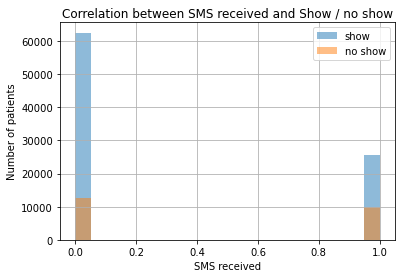

In [33]:
# finding out the correlation between SMS received and show / no show status
df.SMS_received[show].hist(alpha=0.5, bins=20, label='show')
df.SMS_received[no_show].hist(alpha=0.5, bins=20, label='no show')
plt.title('Correlation between SMS received and Show / no show')
plt.xlabel('SMS received')
plt.ylabel('Number of patients')
plt.legend();

 It seems like the number of patients who attended the appointment and didn't receive an SMS is greater than those who received an SMS , we see that from the visualization we create, in the x-axis 0 means no SMS and 1 means that the patient receive an SMS.

### Research Question 2  (Is there a correlation between having a scholarship and attendance?)

 We try to find out if the patients who having a scholarship are more interesed in this appointment?

In [49]:
# number of patients who having a scholarship and who didn't have it
df.Scholarship.value_counts()

0    99658
1    10861
Name: Scholarship, dtype: int64

 Most of patients doesn't have a scholarship

In [50]:
# number of patients who having a scholarship or not according to attendance
df.Scholarship[show].value_counts()

0    79920
1     8283
Name: Scholarship, dtype: int64

In [51]:
# number of patients who having a scholarship or not according to absent
df.Scholarship[no_show].value_counts()

0    19738
1     2578
Name: Scholarship, dtype: int64

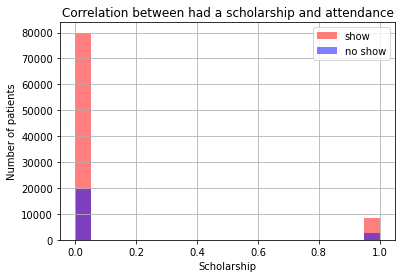

In [37]:
# finding out the effect of having a scholarship in the attendance
df.Scholarship[show].hist(alpha=0.5, bins=20, color='red', label='show')
df.Scholarship[no_show].hist(alpha=0.5, bins=20, color='blue', label='no show')
plt.title('Correlation between had a scholarship and attendance')
plt.xlabel('Scholarship')
plt.ylabel('Number of patients')
plt.legend();


It is clear that the patients who had not  a scholarship are more likely attended the appointment than those who had it, in the x-axis 0 means the patient had not a scholarship and 1 means  the patient had a sholarship.

### Research Question 3 (Is there a correlation between gender and attendance of patients?)

In [72]:
# number of females and males who have taken appointment to attend
df.groupby('Gender').No_show.count()

Gender
F    71832
M    38687
Name: No_show, dtype: int64

We try to find out if the gender of patient affect in his attendance

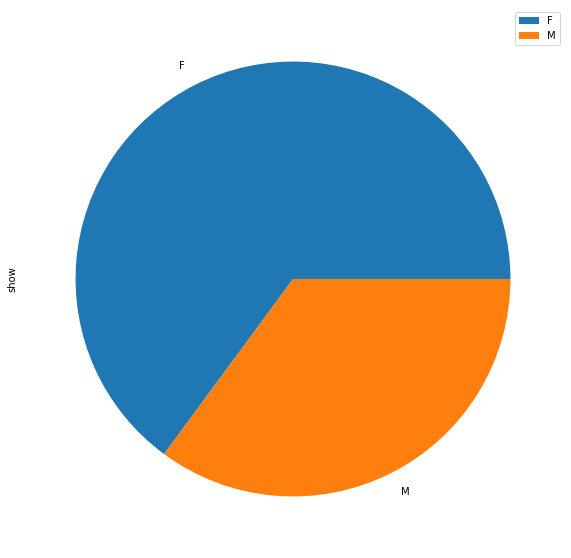

In [77]:
# finding out the correlation between gender and attendance
df[show].Gender.value_counts().plot(kind='pie', figsize=(15,10), label='show')
plt.legend();

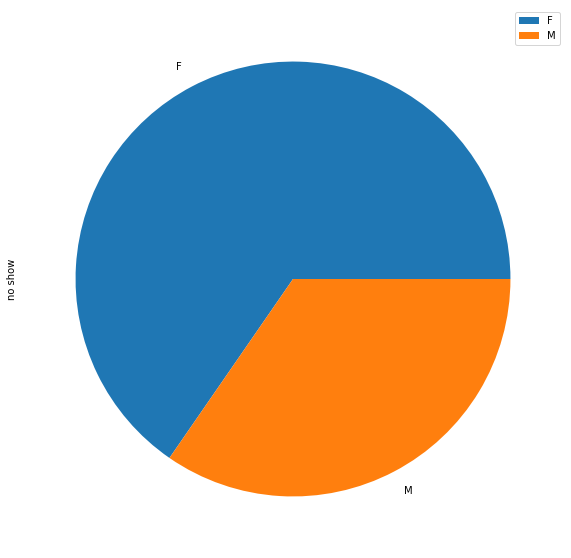

In [78]:
df[no_show].Gender.value_counts().plot(kind='pie', figsize=(15,10), label='no show')
plt.legend();

It looks like the attendance and absent of both gender (Male and Female) are the same.

### Research Question 4 (Is age affect the attendance of patients?)

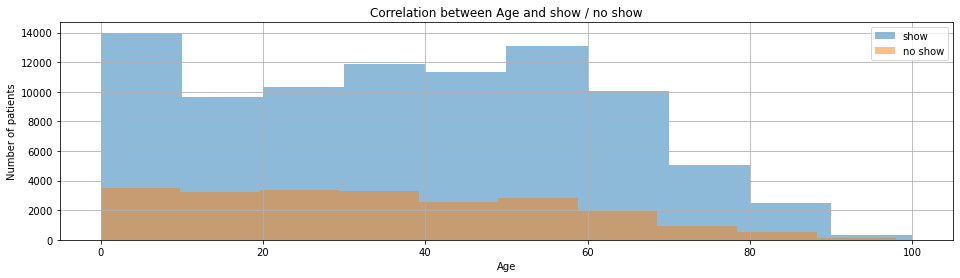

In [31]:
# finding out the correlation betwwen the age and show / no show status
plt.figure(figsize=[16, 4])
df.Age[show].hist(alpha=0.5, label='show')
df.Age[no_show].hist(alpha=0.5, label='no show')
plt.title('Correlation between Age and show / no show')
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.legend();

Clearly from the visualization we made, patients who have from 0 to 10 and from 50 to 60 are the most attended patients, on the other hand, patients who have 65 years old or more are the least attended the appointment.

### Research Question 5 (Is age and having deseases affect in the attendance of patients?)

In [69]:
# finding out the effect of age and having diseases on attendance
df[show].groupby(['Hypertension', 'Diabetes']).mean()['Age']

Hypertension  Diabetes
0             0           31.507180
              1           53.666952
1             0           59.697784
              1           63.406361
Name: Age, dtype: float64

In [38]:
df[no_show].groupby(['Hypertension', 'Diabetes']).mean()['Age']

Hypertension  Diabetes
0             0           28.819995
              1           49.183391
1             0           58.377043
              1           62.820333
Name: Age, dtype: float64

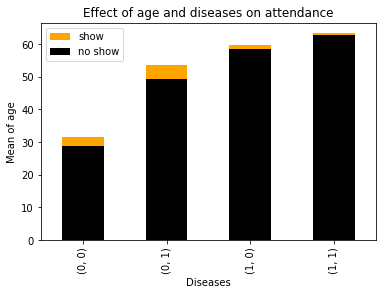

In [71]:
# finding out the effect of age and having diseases on attendance
df[show].groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind='bar', color='orange', label='show')
df[no_show].groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind='bar', color='black', label='no show')
plt.xlabel('Diseases')
plt.ylabel('Mean of age')
plt.title('Effect of age and diseases on attendance')
plt.legend();


From the visualization we created, the x-axis (0,0) means the patients do have not any of these two diseases. (0,1) means the patients have only Hypertension, (1,0) means the patients have only Diabetes, (1,1) means the patients have both two diseases.
Clearly, the patients who have only Hypertension and are of age under 60 are the most attended compared to other cases, and the patients who have both two diseases and are of age above 60 are the most absent compared to other cases.

### Research Question 6 (Is there a correlation between neighbourhood and attendance?)

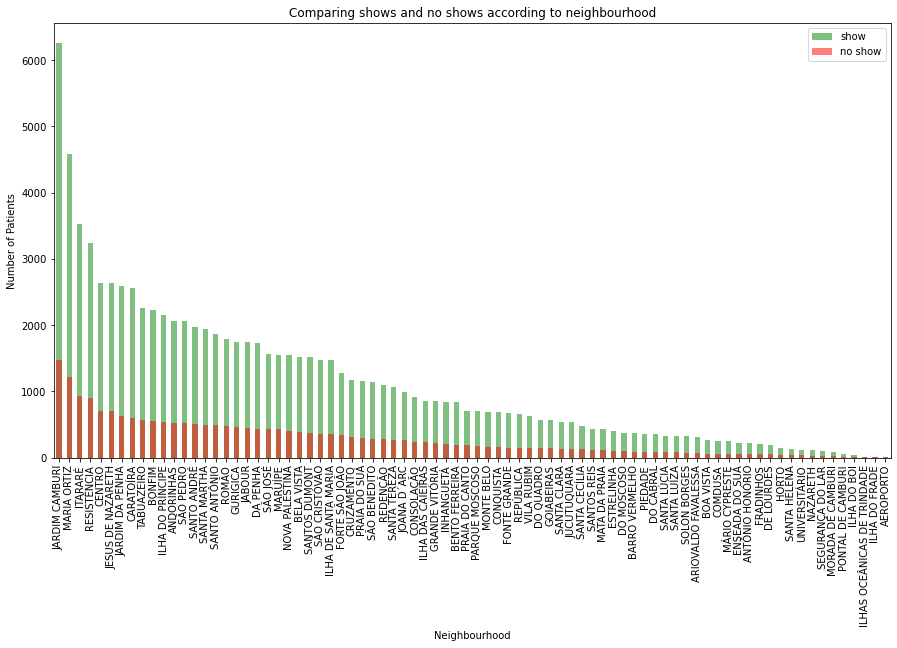

In [90]:
# Let's compare show and no show according to neighbourhood 
plt.figure(figsize=[15,8])
df.Neighbourhood[show].value_counts().plot(kind = 'bar', alpha = 0.5, color= 'green', label = 'show')
df.Neighbourhood[no_show].value_counts().plot(kind = 'bar', alpha = 0.5, color= 'red', label = 'no show')
plt.title('Comparing shows and no shows according to neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Patients')
plt.legend();

One of the neighbourhoods, Jardim Camburi, appears to have the highest number of shows.

It appears that the neighbourhood could have a strong effect on whether or not the patient shows up to their appointment.

<a id='conclusions'></a>
## Conclusions
The result I get from my investigation that receiving an SMS, having a scholarship or gender of the patient is not affected the attendance of our patient, on the other hand, age of patients and neighborhood effect the attendance also patients of age above 60 and have two of this diseases (Hypertension, Diabetes) are the most patients that didn't attend their appointment.
So we have to focus on those older patients and try to find a way to reach them like Setting a medical appointment for them in their homes.






## Limitations

 The data need to improve, we need more information about the patient's registry and be careful about the data we collect there is an age equal to -1 !!